In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\tayoo_x4di65g\Downloads\data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:>

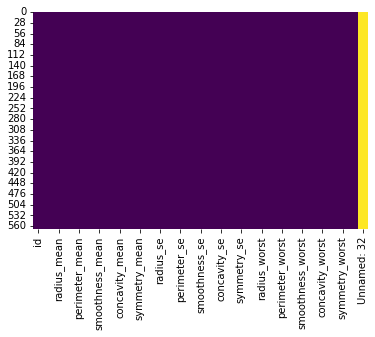

In [4]:
sns.heatmap(df.isna(), cmap= 'viridis',cbar = False)

In [6]:
len(df.columns)

33

In [7]:
df.columns[:10]

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean'],
      dtype='object')

In [8]:
new_df = df[df.columns[:10]]

In [9]:
new_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


##### I want to analyze this data and before doing so I want to state that I am not an expert in cancer research and stress how important an actual professional in the field is, data analysis and ML is Garbage In Garbage Out and actual knowledge of data is paramount but I will provide what I actually know about these columns in the cell below

id: patient or case id number 

diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean: mean of distances from center to points on the perimeter

texture_mean: standard deviation of gray-scale values

perimeter_mean: mean size of the core tumor

area_mean: 

smoothness_mean: mean of local variation in radius lengths

compactness_mean: mean of perimeter^2 / area - 1.0

concavity_mean: mean of severity of concave portions of the contour

concave points_mean: mean for number of concave portions of the contour

In [11]:
# I want to analyze the format of our data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   569 non-null    int64  
 1   diagnosis            569 non-null    object 
 2   radius_mean          569 non-null    float64
 3   texture_mean         569 non-null    float64
 4   perimeter_mean       569 non-null    float64
 5   area_mean            569 non-null    float64
 6   smoothness_mean      569 non-null    float64
 7   compactness_mean     569 non-null    float64
 8   concavity_mean       569 non-null    float64
 9   concave points_mean  569 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 44.6+ KB


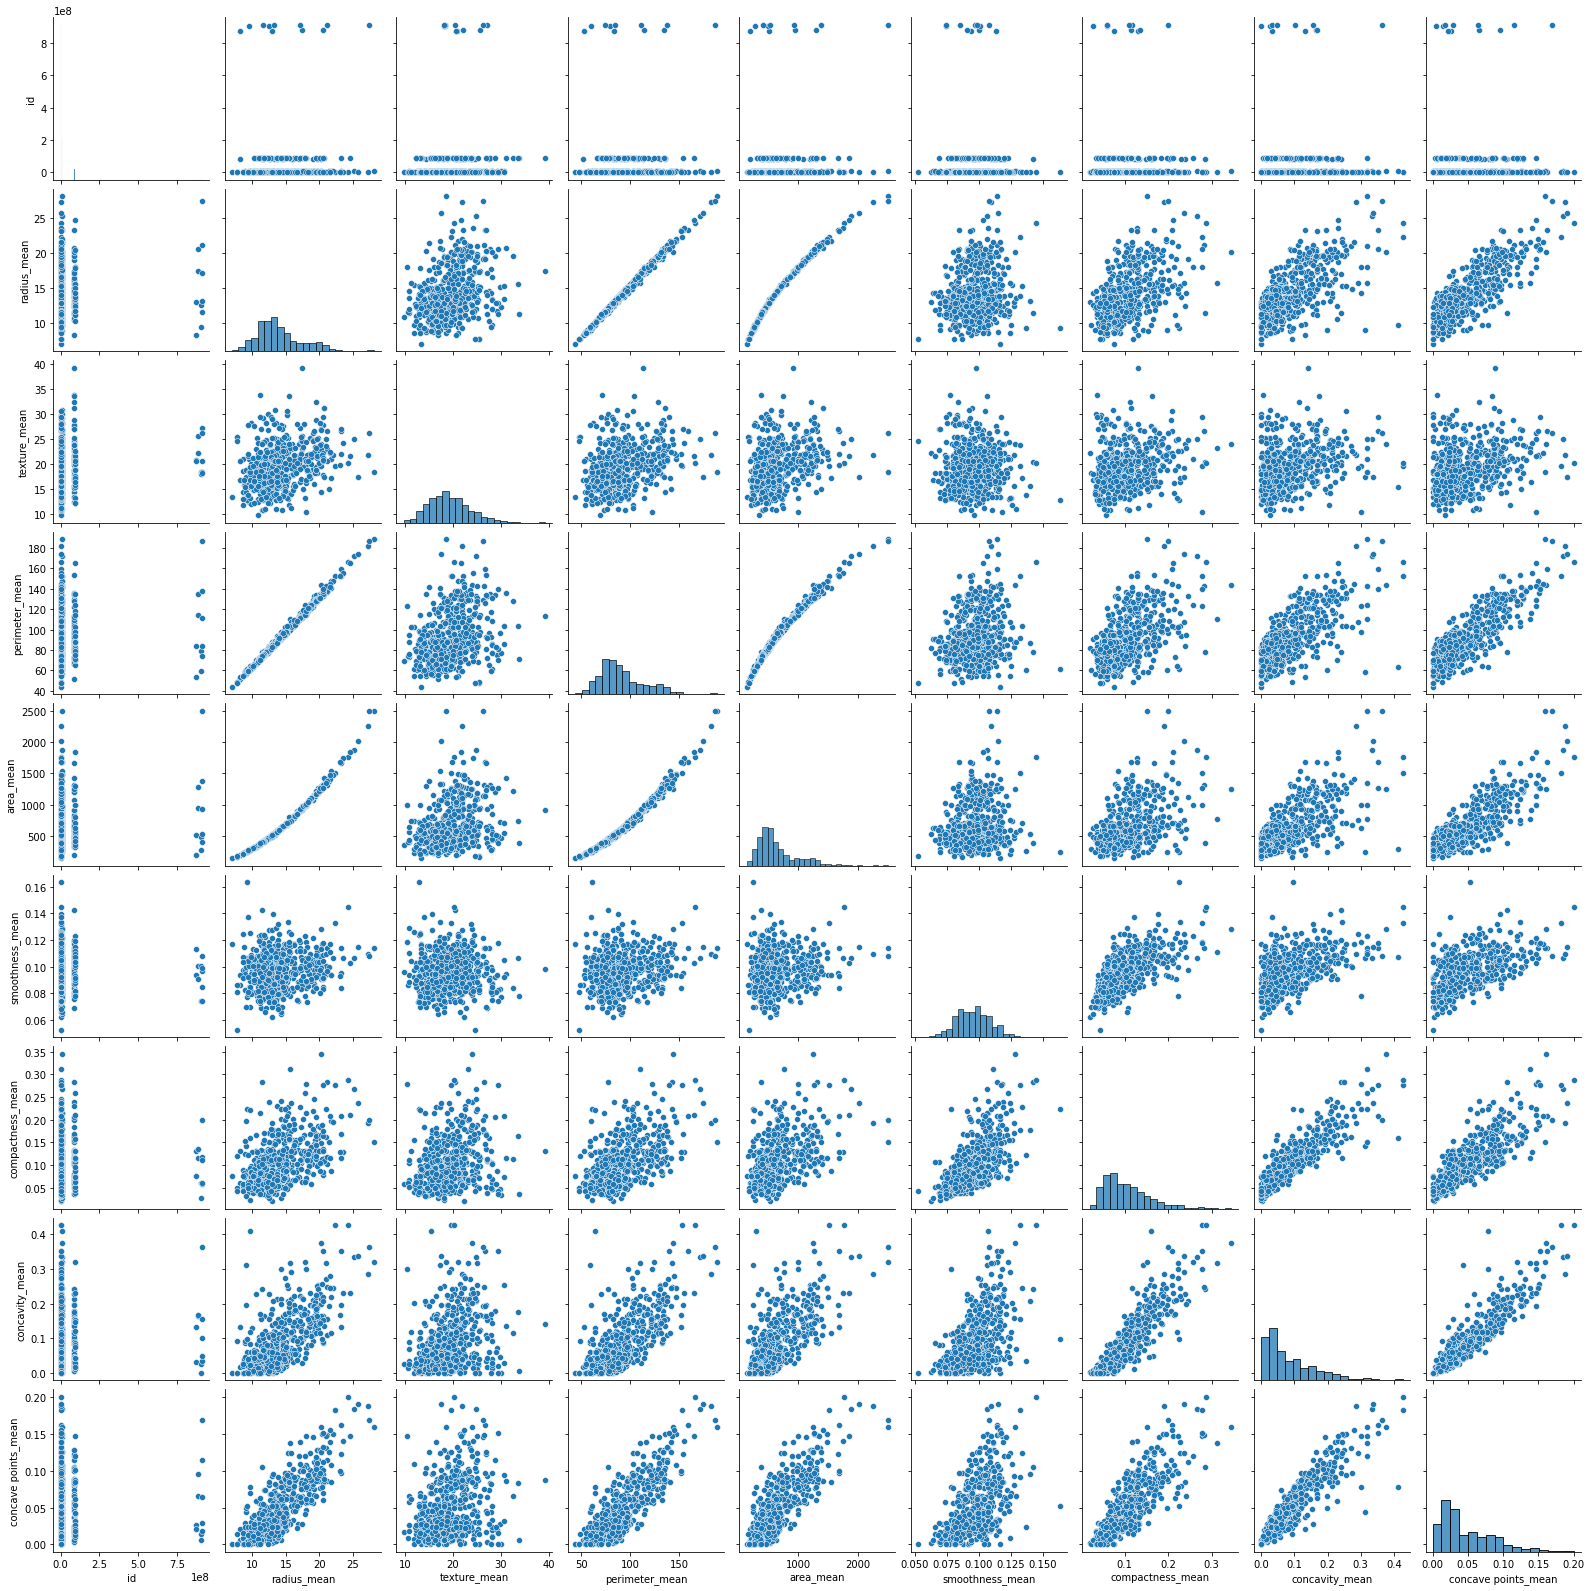

In [13]:
sns.pairplot(new_df) #we can see that a lot of our features are correlated 

In [ ]:
def binary_fate(x):
    '''I'm writing a program to convert Benign or Malignant to 1s and 0s to help our algorithm'''
    if x.upper() == 'M':
        return 1
    elif x.upper() == 'B':
        return 0  

In [14]:
new_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


In [16]:
new_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200


##### Time to build our model

##### First, I need to split data into training and testing data

In [17]:
from  sklearn.model_selection import train_test_split

In [18]:
X = new_df.drop(['id','diagnosis'],axis=1)
y = new_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()

In [22]:
#fit data into model
logmodel.fit(X_train, y_train)

C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
#time to evaluate our model
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

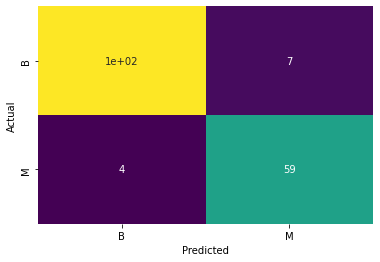

In [26]:
# Visualizing the confusion matrix
cm_dict = {'y_actual': y_test, 'y_predictions': predictions}
cm_df = pd.DataFrame(cm_dict,columns=['y_actual','y_predictions'])
cm = pd.crosstab(cm_df['y_actual'],cm_df['y_predictions'],rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm,cmap='viridis',cbar = False, annot=True)

In [27]:
print(confusion_matrix(y_test,predictions))

[[101   7]
 [  4  59]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



##### A 94% accuracy was acheived for our model, this can be improved by discussing with and consulting a cancer research expert or a cancer physician.